In [1]:
# !pip install --upgrade pip
# !pip install numpy --quiet
# !pip install matplotlib --quiet
# !pip install scipy --quiet


In [2]:
import numpy as np  
import matplotlib.pyplot as plt
import scipy.integrate 

import wavefuncitons
from wavefuncitons import corenell_wave_function

from enum import Enum
from data import ParticleNames, particle_masses

import numericalSolvers

In [3]:
U0 = [0,1]
r = np.linspace(0.0000001, 15, 1000)
charmonium_cornell_alpha = 0.4
initial_charmonium_cornell_beta = 0.195

charm_quark_mass = particle_masses[ParticleNames.CHARM]
charmonium_mass_1S = particle_masses[ParticleNames.CHARMONIUM]['1S']


recpricol_reduced_mass = 1/charm_quark_mass + 1/charm_quark_mass
reduced_charmonium_mass = 1/recpricol_reduced_mass

charmonium_energy_1S = particle_masses[ParticleNames.CHARMONIUM]['1S'] - 2*particle_masses[ParticleNames.CHARM]


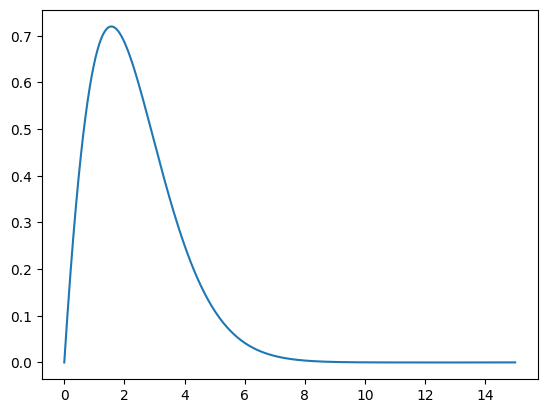

In [4]:

charmonium_beta, sol = numericalSolvers.calibration_staircase(
        U0, r, corenell_wave_function, 
        potential_arguments=(charmonium_cornell_alpha, charmonium_energy_1S, reduced_charmonium_mass),
        b_lower = initial_charmonium_cornell_beta, 
        flight = 30
    )

u, v = sol[:,0], sol[:,1]
plt.plot(r, u)
last_energy_value = charmonium_energy_1S

E_20 = 0.44390000002793983
M_20 = 2.9839000000279396
E_32 = 1.2620285466882404
M_32 = 3.8020285466882404


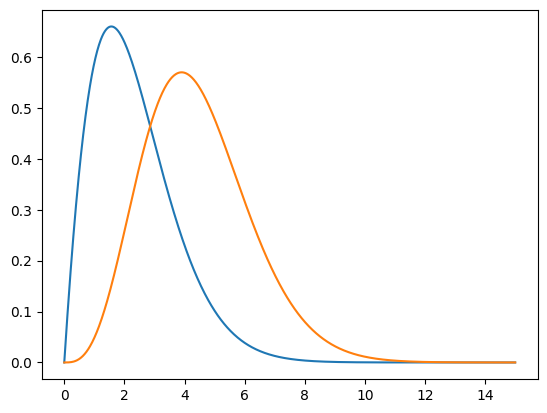

In [5]:

n = 2
l = 0

# if l == 0:
#     last_energy_value = charmonium_energy_1S
last_energy_value = charmonium_energy_1S
offset = 0 
E, sol = numericalSolvers.solve_for_energy(
    U0, r, corenell_wave_function, n,
    potential_arguments=(l, charmonium_cornell_alpha, charmonium_beta, reduced_charmonium_mass),
    epsilon_lower = last_energy_value, 
    flight = 30
)
u = sol[:,0]
v= sol[:,1]

pdf = wavefuncitons.square_wavefunction(u)

pdf, u, v = wavefuncitons.normalise_wavefunction(pdf, u, v, r)
# if max(pdf) > 2:
#     print(f"{n}{l} has a PDF with a peak amplitude of {max(pdf)}")
#     continue

plt.plot(r, u)#, linestyle = line_styles[l])
print(f"E_{n}{l} = {E}")
print(f"M_{n}{l} = {E+2*charm_quark_mass}")
last_energy_value = E

n = 3
l=2
E, sol = numericalSolvers.solve_for_energy(
    U0, r, corenell_wave_function, n,
    potential_arguments=(l, charmonium_cornell_alpha, charmonium_beta, reduced_charmonium_mass),
    epsilon_lower = last_energy_value, 
    flight = 30
)
u = sol[:,0]
v= sol[:,1]

pdf = wavefuncitons.square_wavefunction(u)

pdf, u, v = wavefuncitons.normalise_wavefunction(pdf, u, v, r)



# if max(pdf) > 2:
#     print(f"{n}{l} has a PDF with a peak amplitude of {max(pdf)}")
#     continue

plt.plot(r, u)#, linestyle = line_styles[l])
print(f"E_{n}{l} = {E}")
print(f"M_{n}{l} = {E+2*charm_quark_mass}")
last_energy_value = E

This is not the final method used to create the write up in this repo, but is given to demonsatrate the type of code written for the project.

charmonium_energy_1S = 0.4439000000000002
E_10 = 0.44390000002225855
E_20 = 1.1346651113568802
E_21 = 1.4629716069786807
E_30 = 1.650020347225945
E_31 = 1.9204902004962783
E_32 = 2.1599434703635048
E_40 = 2.487879568433854
E_41 = 2.697804051274433
E_42 = 2.8819667187030413
E_43 = 3.0514478916628267
0.21305281592532993


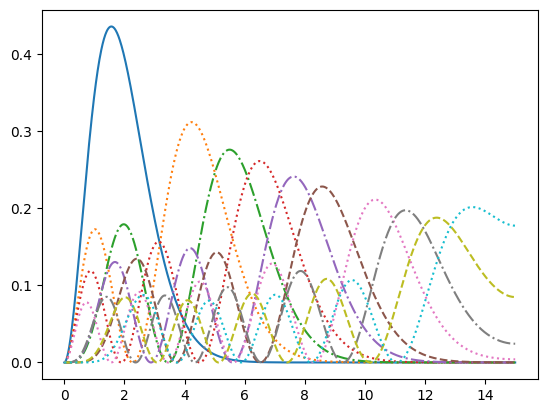

In [8]:

last_energy_value = 0
offset = 0.01
print(f"charmonium_energy_1S = {charmonium_energy_1S}")
N = 3

line_styles = ['dotted', 'dashdot', 'dashed']

wfns = []
for n in [1, 2, 3, 4]:
    for l in range(0, n):
        E, sol = numericalSolvers.solve_for_energy(
            U0, r, corenell_wave_function, n,
            potential_arguments=(l, charmonium_cornell_alpha, charmonium_beta, reduced_charmonium_mass),
            epsilon_lower = last_energy_value + offset, 
            flight = 30
        )
        u = sol[:,0]
        v= sol[:,1]
                
        
        pdf = wavefuncitons.square_wavefunction(u)
        pdf, u, v = wavefuncitons.normalise_wavefunction(pdf, u, v, r)
        
        ls = 'solid' if n == 1 else line_styles[l%len(line_styles)]
        plt.plot(r, pdf, linestyle = ls)
        print(f"E_{n}{l} = {E}")
        # print(f"M_{n}{l} = {E+2*charm_quark_mass}")
        last_energy_value = E

# for i in range(len(wfns)-1):
#     print(np.array_equal(wfns[i], wfns[i+1]))

print(charmonium_beta)
plt.show()


